In [ ]:
!pip install torch torchtext scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
!pip install torchtext

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.4 MB/s eta 0:00:00


In [ ]:
!pip install nltk


In [ ]:
import torch
from collections import Counter
from torch.nn.utils.rnn import pad_sequence
import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import pandas as pd

# Load dataset
file_path = "/content/stopword_removed_balanced.csv"  # Use the correct filename
df = pd.read_csv(file_path)

# Print dataset info
print("Dataset shape:", df.shape)

# Show first few rows
print(df.head())


Dataset shape: (5640, 10)
                                               Title  \
0  Enough Greenland. US wants Denmark's help egg ...   
1  Trading Frenzy: Microsoft Stock Rallies Due Re...   
2            Stock Market Chaos: Gold Dips 24 Hours!   
3    Stock market update: Mining stocks market rises   
4  BREAKING: Netflix Stock Hits Record High Earni...   

                                                Text  Real  Sentiment_Numeric  \
0  US Denmark may odds Greenland, comes solving e...     1                 -1   
1  Financial markets rattled Financial Experts Mi...     0                  1   
2  Stock market experts say Analysts Gold Dips co...     0                 -1   
3          30-share BSE Sensex 573.8 points 73563.73     1                  0   
4  Market analysts believe Analysts Netflix resul...     0                  1   

   uppercase_word_count  exclamation_count  text_length  word_count  \
0                     1                  0          142          26   
1       

In [ ]:
print("Missing Sentiment values:", df["Sentiment_Numeric"].isnull().sum())

# Drop rows with missing Sentiment
df = df.dropna(subset=["Sentiment_Numeric"])

# Check if we still have data
print("Dataset shape after dropping missing Sentiments:", df.shape)


Missing Sentiment values: 0
Dataset shape after dropping missing Sentiments: (5640, 10)


In [ ]:
print("Unique Sentiment values before processing:", df["Sentiment_Numeric"].unique())
df["Sentiment_Numeric"] = df["Sentiment_Numeric"].replace(-1, 2)

# Recheck unique values
print("Unique Sentiment values after processing:", df["Sentiment_Numeric"].unique())


Unique Sentiment values before processing: [-1  1  0]
Unique Sentiment values after processing: [2 1 0]


In [ ]:
# First, check unique values
print("Unique Sentiment_Numeric values:", df["Sentiment_Numeric"].unique())

# Mapping
sentiment_mapping = {1: "positive", 2: "negative", 0: "neutral"}

# Create new text column
df["Sentiment_Text"] = df["Sentiment_Numeric"].map(sentiment_mapping)

# Drop rows where mapping failed (optional safety)
df = df.dropna(subset=["Sentiment_Text"])

# Final checks
print("Unique Sentiment_Text values:", df["Sentiment_Text"].unique())
print(df[["Sentiment_Numeric", "Sentiment_Text"]].head())


Unique Sentiment_Numeric values: [2 1 0]
Unique Sentiment_Text values: ['negative' 'positive' 'neutral']
   Sentiment_Numeric Sentiment_Text
0                  2       negative
1                  1       positive
2                  2       negative
3                  0        neutral
4                  1       positive


In [ ]:
df["combined_text"] = df["Title"].fillna("") + " " + df["Text"].fillna("")
df["combined_text"] = df["combined_text"].str.strip()

# Check non-empty text rows
non_empty_texts = df["combined_text"] != ""
print("Number of valid text rows:", non_empty_texts.sum())

# Drop empty text rows
df = df[non_empty_texts]

print("Final dataset shape after removing empty texts:", df.shape)


Number of valid text rows: 5640
Final dataset shape after removing empty texts: (5640, 12)


In [ ]:
print("Total rows in dataset:", len(df))
print("Number of empty text rows:", (df["combined_text"].str.strip() == "").sum())


Total rows in dataset: 5640
Number of empty text rows: 0


In [ ]:
# Check missing values
print("Missing values per column:\n", df.isnull().sum())

# Check unique values in 'Sentiment' column
print("Unique Sentiment values:", df["Sentiment_Numeric"].unique())

# Check the first few rows of text data
print(df[["Title", "Text"]].head())


Missing values per column:
 Title                   0
Text                    0
Real                    0
Sentiment_Numeric       0
uppercase_word_count    0
exclamation_count       0
text_length             0
word_count              0
special_char_count      0
number_count            0
Sentiment_Text          0
combined_text           0
dtype: int64
Unique Sentiment values: [2 1 0]
                                               Title  \
0  Enough Greenland. US wants Denmark's help egg ...   
1  Trading Frenzy: Microsoft Stock Rallies Due Re...   
2            Stock Market Chaos: Gold Dips 24 Hours!   
3    Stock market update: Mining stocks market rises   
4  BREAKING: Netflix Stock Hits Record High Earni...   

                                                Text  
0  US Denmark may odds Greenland, comes solving e...  
1  Financial markets rattled Financial Experts Mi...  
2  Stock market experts say Analysts Gold Dips co...  
3          30-share BSE Sensex 573.8 points 73563.73  
4 

In [ ]:
df["Title"] = df["Title"].fillna("")
df["Text"] = df["Text"].fillna("")
df["combined_text"] = (df["Title"] + " " + df["Text"]).str.strip()


In [ ]:
print("✅ Fixed Sentiment values:", df["Sentiment_Numeric"].unique())
print("Number of valid text rows:", (df["combined_text"] != "").sum())
print("Final dataset shape after fixing:", df.shape)


✅ Fixed Sentiment values: [2 1 0]
Number of valid text rows: 5640
Final dataset shape after fixing: (5640, 12)


In [ ]:
df.to_csv("/content/stocks_fixed.csv", index=False)
print("✅ Cleaned dataset saved as 'stocks_fixed.csv'")


✅ Cleaned dataset saved as 'stocks_fixed.csv'


In [ ]:
from sklearn.model_selection import train_test_split

# Extract texts & labels
texts = df["combined_text"].tolist()
labels = df["Sentiment_Numeric"].tolist()

# Split into train & validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.1, random_state=42, stratify=labels
)

print(f"✅ Data Split Done! Train: {len(train_texts)}, Validation: {len(val_texts)}")


✅ Data Split Done! Train: 5076, Validation: 564


In [ ]:
# Tokenization function
def tokenize(text):
    return text.lower().split()  # Convert to lowercase and split on spaces

# Apply tokenization
train_tokens = [tokenize(text) for text in train_texts]
val_tokens = [tokenize(text) for text in val_texts]

print(f"✅ Tokenization Done! Example: {train_tokens[0]}")


✅ Tokenization Done! Example: ['breaking:', 'google', 'stock', 'breaks', 'all-time', 'low', 'tech', 'breakthrough', 'report!', 'wall', 'street', 'causing', 'turmoil,', 'google', 'breaks', 'all-time', 'low', 'traders', 'unsure', 'comes', 'next.', 'experts', 'weigh', 'potential', 'impact.']


In [ ]:
from collections import Counter

# Count word frequencies
word_freq = Counter(word for sentence in train_tokens for word in sentence)

# Create word-to-index mapping
vocab = {"<PAD>": 0, "<UNK>": 1}  # Special tokens
vocab.update({word: i+2 for i, (word, _) in enumerate(word_freq.most_common())})

# Function to convert text to numerical sequence
def text_to_sequence(tokens, vocab):
    return [vocab.get(word, vocab["<UNK>"]) for word in tokens]

print(f"✅ Vocabulary Built! Total words: {len(vocab)}")
print(f"Example text to sequence: {text_to_sequence(train_tokens[0], vocab)}")


✅ Vocabulary Built! Total words: 14066
Example text to sequence: [108, 36, 2, 23, 22, 37, 63, 152, 54, 6, 7, 80, 85, 36, 23, 22, 37, 9, 86, 69, 83, 5, 75, 66, 19]


In [ ]:
import torch
from torch.nn.utils.rnn import pad_sequence

# Define max length for sequences
MAX_LEN = min(50, max(len(seq) for seq in train_tokens))  # Choose max of 50 or max sequence length

# Convert text tokens to sequences
train_sequences = [text_to_sequence(tokens, vocab)[:MAX_LEN] for tokens in train_tokens]
val_sequences = [text_to_sequence(tokens, vocab)[:MAX_LEN] for tokens in val_tokens]

# Pad sequences
def pad_sequences(sequences, max_length):
    return pad_sequence(
        [torch.tensor(seq, dtype=torch.long) for seq in sequences],
        batch_first=True,
        padding_value=vocab["<PAD>"]
    )

train_sequences = pad_sequences(train_sequences, MAX_LEN)
val_sequences = pad_sequences(val_sequences, MAX_LEN)

# Convert labels to tensors
train_labels = torch.tensor(train_labels, dtype=torch.long)
val_labels = torch.tensor(val_labels, dtype=torch.long)

print(f"✅ Padding Done! Example sequence: {train_sequences[0]}")


✅ Padding Done! Example sequence: tensor([108,  36,   2,  23,  22,  37,  63, 152,  54,   6,   7,  80,  85,  36,
         23,  22,  37,   9,  86,  69,  83,   5,  75,  66,  19,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0])


In [ ]:
from torch.utils.data import Dataset, DataLoader

# Custom dataset class
class SentimentDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = sequences
        self.labels = labels

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        return self.sequences[idx], self.labels[idx]

# Create dataset objects
train_dataset = SentimentDataset(train_sequences, train_labels)
val_dataset = SentimentDataset(val_sequences, val_labels)

# DataLoader for batching
BATCH_SIZE = 16
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(f"✅ DataLoader Ready! Training batches: {len(train_loader)}, Validation batches: {len(val_loader)}")


✅ DataLoader Ready! Training batches: 318, Validation batches: 36


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define Improved LSTM Model
class SentimentLSTM(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim, num_layers=2, dropout=0.3):
        super(SentimentLSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=vocab["<PAD>"])
        self.lstm = nn.LSTM(
            embed_dim,
            hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout,
            bidirectional=True  # <-- Added Bidirectional LSTM
        )
        self.fc = nn.Linear(hidden_dim * 2, output_dim)  # hidden_dim*2 due to bidirectional
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = self.embedding(x)
        lstm_out, (h_n, c_n) = self.lstm(x)
        # Concatenate last hidden states from both directions
        out_forward = h_n[-2,:,:]
        out_backward = h_n[-1,:,:]
        out = torch.cat((out_forward, out_backward), dim=1)
        out = self.dropout(out)
        out = self.fc(out)
        return out  # <-- Softmax will be applied later during evaluation or loss calculation


# Model Hyperparameters
VOCAB_SIZE = len(vocab)
EMBED_DIM = 128  # Increased embedding size
HIDDEN_DIM = 256  # Increased hidden dimension
OUTPUT_DIM = 3
NUM_LAYERS = 2
DROPOUT = 0.3

# Instantiate model
model = SentimentLSTM(VOCAB_SIZE, EMBED_DIM, HIDDEN_DIM, OUTPUT_DIM, NUM_LAYERS, DROPOUT)
print("✅ Improved LSTM Model Created!")


✅ Improved LSTM Model Created!


In [ ]:
import torch.optim as optim

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)  # <-- Added label smoothing
optimizer = optim.AdamW(model.parameters(), lr=2e-4, weight_decay=1e-5)  # <-- AdamW + adjusted lr

# Training function
def train_model(model, train_loader, val_loader, epochs=10):
    for epoch in range(epochs):
        model.train()
        total_loss = 0

        for batch in train_loader:
            input_ids = batch["input_ids"].to(device)
            labels = batch["labels"].to(device)

            optimizer.zero_grad()
            outputs = model(input_ids)

            loss = criterion(outputs, labels)
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # <-- Gradient Clipping
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch + 1}/{epochs}, Training Loss: {avg_loss:.4f}")

        # Evaluate after each epoch
        evaluate_model(model, val_loader)

    print("✅ Training Finished!")

print("✅ Training Setup Ready!")


✅ Training Setup Ready!


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, f1_score

def evaluate_model(model, val_loader):
    model.eval()
    predictions, true_labels = [], []

    with torch.no_grad():
        for batch in val_loader:
            input_ids, labels = batch
            input_ids = input_ids.to(device)
            labels = labels.to(device)

            outputs = model(input_ids)
            preds = torch.argmax(outputs, dim=1).cpu().numpy()

            predictions.extend(preds)
            true_labels.extend(labels.cpu().numpy())

    # Calculate metrics
    accuracy = accuracy_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions, average='weighted')  # <-- Added weighted F1-score

    print(f"✅ Validation Accuracy: {accuracy:.4f}")
    print(f"✅ Weighted F1 Score: {f1:.4f}")
    print("\nClassification Report:\n", classification_report(true_labels, predictions, digits=4))


In [ ]:
import torch.optim as optim
from tqdm import tqdm

# Define optimizer and loss function (already improved Adam parameters)
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)  # <-- Added small weight decay
loss_fn = nn.CrossEntropyLoss(label_smoothing=0.1)  # <-- Added label smoothing

def train_model(model, train_loader, val_loader, epochs=5):
    model.to(device)

    for epoch in range(epochs):
        model.train()
        total_loss = 0

        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}", leave=False)

        for batch in progress_bar:
            input_ids, labels = batch

            input_ids = input_ids.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(input_ids)
            loss = loss_fn(outputs, labels)

            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # <-- Gradient Clipping
            optimizer.step()

            total_loss += loss.item()
            progress_bar.set_postfix(loss=loss.item())

        avg_loss = total_loss / len(train_loader)
        print(f"🔵 Epoch {epoch+1}/{epochs} | Average Loss: {avg_loss:.4f}")

        # Evaluate after each epoch
        evaluate_model(model, val_loader)

    print("✅ Training Complete!")

# Start training
train_model(model, train_loader, val_loader, epochs=5)


🔵 Epoch 1/5 | Average Loss: 0.9555
✅ Validation Accuracy: 0.7642
✅ Weighted F1 Score: 0.7683

Classification Report:
               precision    recall  f1-score   support

           0     0.6154    0.8511    0.7143       188
           1     0.8978    0.6543    0.7569       188
           2     0.8862    0.7872    0.8338       188

    accuracy                         0.7642       564
   macro avg     0.7998    0.7642    0.7683       564
weighted avg     0.7998    0.7642    0.7683       564



🔵 Epoch 2/5 | Average Loss: 0.6629
✅ Validation Accuracy: 0.8138
✅ Weighted F1 Score: 0.8158

Classification Report:
               precision    recall  f1-score   support

           0     0.7118    0.8670    0.7818       188
           1     0.8538    0.7766    0.8134       188
           2     0.9146    0.7979    0.8523       188

    accuracy                         0.8138       564
   macro avg     0.8267    0.8138    0.8158       564
weighted avg     0.8267    0.8138    0.8158       564



🔵 Epoch 3/5 | Average Loss: 0.5835
✅ Validation Accuracy: 0.8174
✅ Weighted F1 Score: 0.8197

Classification Report:
               precision    recall  f1-score   support

           0     0.7143    0.8777    0.7876       188
           1     0.8266    0.7606    0.7922       188
           2     0.9563    0.8138    0.8793       188

    accuracy                         0.8174       564
   macro avg     0.8324    0.8174    0.8197       564
weighted avg     0.8324    0.8174    0.8197       564



🔵 Epoch 4/5 | Average Loss: 0.5440
✅ Validation Accuracy: 0.8599
✅ Weighted F1 Score: 0.8614

Classification Report:
               precision    recall  f1-score   support

           0     0.7458    0.9362    0.8302       188
           1     0.9355    0.7713    0.8455       188
           2     0.9480    0.8723    0.9086       188

    accuracy                         0.8599       564
   macro avg     0.8764    0.8599    0.8614       564
weighted avg     0.8764    0.8599    0.8614       564



🔵 Epoch 5/5 | Average Loss: 0.5033
✅ Validation Accuracy: 0.8688
✅ Weighted F1 Score: 0.8697

Classification Report:
               precision    recall  f1-score   support

           0     0.7669    0.9628    0.8538       188
           1     0.9012    0.7766    0.8343       188
           2     0.9819    0.8670    0.9209       188

    accuracy                         0.8688       564
   macro avg     0.8834    0.8688    0.8697       564
weighted avg     0.8834    0.8688    0.8697       564

✅ Training Complete!


In [ ]:
import torch

def predict_sentiment(model, text, vocab, max_length=50):
    """
    Predict the sentiment of a given text using the trained LSTM model.

    Args:
        model: Trained LSTM model
        text: Input text string
        vocab: Vocabulary object for tokenization
        max_length: Maximum sequence length for padding

    Returns:
        Predicted sentiment (0 = Neutral, 1 = Positive, 2 = Negative)
    """
    model.eval()  # Set model to evaluation mode

    # Tokenize and convert text to numerical sequence
    tokens = text.split()  # Simple whitespace-based tokenization
    sequence = [vocab[token] if token in vocab else vocab["<UNK>"] for token in tokens]

    # Pad or truncate sequence
    if len(sequence) < max_length:
        sequence += [vocab["<PAD>"]] * (max_length - len(sequence))  # Pad
    else:
        sequence = sequence[:max_length]  # Truncate

    # Convert to tensor and add batch dimension
    input_tensor = torch.tensor(sequence).unsqueeze(0).to(device)  # Shape: (1, max_length)

    # Get model prediction
    with torch.no_grad():
        output = model(input_tensor)
        predicted_label = torch.argmax(output, dim=1).item()  # Get predicted class

    sentiment_mapping = {0: "Neutral", 1: "Positive", 2: "Negative"}
    return sentiment_mapping[predicted_label]


In [ ]:
from IPython.display import display, HTML
import ipywidgets as widgets
import torch

# Display headings
display(HTML("<h2 style='color:blue;'>Sentiment Prediction</h2>"))
display(HTML("<p style='color:gray;'>Enter a text to predict its <b>Sentiment</b> (Positive, Negative, Neutral).</p>"))

# Text input widget
text_input = widgets.Text(
    value='',
    placeholder='Enter text here...',
    description='Input:',
    layout=widgets.Layout(width='100%')
)

# Output widget
output = widgets.Output()

# Prediction button
predict_button = widgets.Button(
    description='Predict',
    button_style='success',
    tooltip='Click to predict',
    icon='check'
)

# Button click function
def on_predict_button_clicked(b):
    with output:
        output.clear_output()
        user_input = text_input.value.strip()
        if user_input:
            model.eval()
            tokens = user_input.split()
            sequence = [vocab.get(token, vocab["<UNK>"]) for token in tokens]

            # Padding
            max_length = 50
            if len(sequence) < max_length:
                sequence += [vocab["<PAD>"]] * (max_length - len(sequence))
            else:
                sequence = sequence[:max_length]

            # Convert to tensor
            input_tensor = torch.tensor(sequence).unsqueeze(0).to(device)

            with torch.no_grad():
                output_logits = model(input_tensor)  # Get raw logits
                output_probs = torch.softmax(output_logits, dim=1)  # Apply softmax
                predicted_label = torch.argmax(output_probs, dim=1).item()
                confidence = output_probs[0, predicted_label].item()

            # Sentiment mapping
            sentiment_mapping = {0: "Neutral", 1: "Positive", 2: "Negative"}
            predicted_sentiment = sentiment_mapping[predicted_label]

            # Choose color
            color = 'green' if predicted_sentiment.lower() == 'positive' else ('red' if predicted_sentiment.lower() == 'negative' else 'orange')

            # Show results
            display(HTML(f"<p style='color:{color};'><b>Predicted Sentiment:</b> {predicted_sentiment}</p>"))
            display(HTML(f"<p><b>Confidence:</b> {confidence * 100:.2f}%</p>"))
        else:
            display(HTML("<p style='color:red;'>Please enter some text to predict.</p>"))

# Attach button event
predict_button.on_click(on_predict_button_clicked)

# Display UI
display(text_input)
display(predict_button)
display(output)


Text(value='', description='Input:', layout=Layout(width='100%'), placeholder='Enter text here...')

Button(button_style='success', description='Predict', icon='check', style=ButtonStyle(), tooltip='Click to pre…

Output()

In [ ]:
import torch

# Save the model state dictionary
torch.save(model.state_dict(), "Sentiment_model.pth")
print("Model saved successfully!")

Model saved successfully!


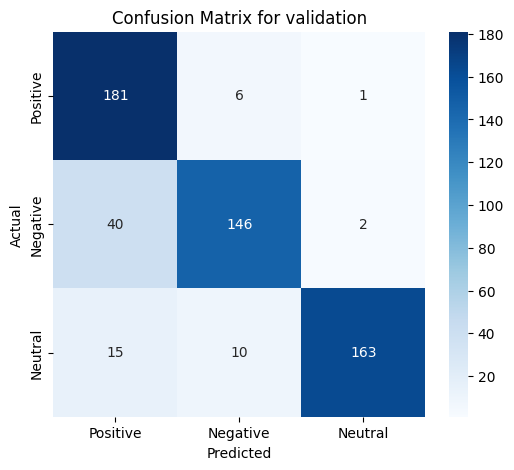

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def evaluate_confusion_matrix(model, data_loader, device):
    """
    Evaluates the model on the validation/test set and generates a confusion matrix.

    Args:
        model: Trained LSTM model
        data_loader: DataLoader for validation or test set
        device: Torch device (CPU/GPU)

    Returns:
        Confusion matrix as a NumPy array
    """
    model.eval()  # Set model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in data_loader:
            # Access input_ids and labels correctly from the tuple
            input_ids, labels = batch  # Assuming batch returns (input_ids, labels)

            input_ids = input_ids.to(device)
            labels = labels.to(device)

            # Get predictions
            outputs = model(input_ids)
            preds = torch.argmax(outputs, dim=1)

            # Collect predictions and true labels
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    return cm

# Generate confusion matrix
conf_matrix = evaluate_confusion_matrix(model, val_loader, device)

# Define class labels
class_labels = ["Positive", "Negative", "Neutral"]

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for validation")
plt.show()

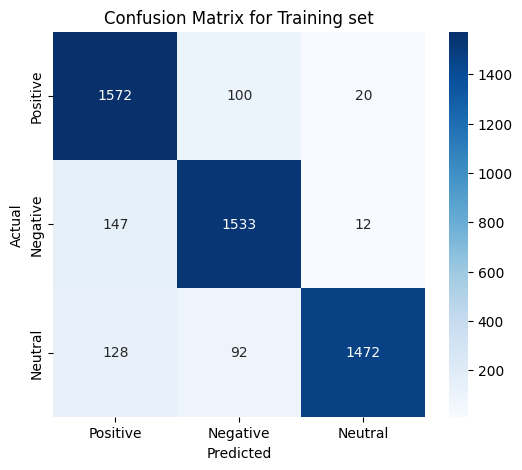

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def evaluate_confusion_matrix(model, data_loader, device):
    """
    Evaluates the model on the validation/test set and generates a confusion matrix.

    Args:
        model: Trained LSTM model
        data_loader: DataLoader for validation or test set
        device: Torch device (CPU/GPU)

    Returns:
        Confusion matrix as a NumPy array
    """
    model.eval()  # Set model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in data_loader:
            # Access input_ids and labels correctly from the tuple
            input_ids, labels = batch  # Assuming batch returns (input_ids, labels)

            input_ids = input_ids.to(device)
            labels = labels.to(device)

            # Get predictions
            outputs = model(input_ids)
            preds = torch.argmax(outputs, dim=1)

            # Collect predictions and true labels
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    return cm

# Generate confusion matrix
conf_matrix = evaluate_confusion_matrix(model, train_loader, device)

# Define class labels
class_labels = ["Positive", "Negative", "Neutral"]

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Training set")
plt.show()

In [ ]:
import torch

# Save the model state dictionary
torch.save(model.state_dict(), "Sentiment_model.pth")
print("Model saved successfully!")

Model saved successfully!
